# **E-Commerce Shipping Prediction**

Dataset: https://lnkd.in/gC387Bfj

In [1]:
# import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,f1_score,precision_score,recall_score,classification_report

import warnings 
from warnings import filterwarnings
filterwarnings("ignore")

sns.set()

In [2]:
# Load the data

data = pd.read_csv("/content/Train.csv")

In [3]:
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
data.shape

(10999, 12)

In [5]:
data.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [7]:
data.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [8]:
data.duplicated().sum()

0

#### **Separate Categorical and Numerical Features**

In [9]:
data.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

**1. Categorical Columns**

In [10]:
cat_col = [clm for clm in data.columns if data[clm].dtype == "O"]
cat_col

['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

In [11]:
data[cat_col].head()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
0,D,Flight,low,F
1,F,Flight,low,M
2,A,Flight,low,M
3,B,Flight,medium,M
4,C,Flight,medium,F


In [12]:
Categorical_col = data[cat_col]
Categorical_col.head()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
0,D,Flight,low,F
1,F,Flight,low,M
2,A,Flight,low,M
3,B,Flight,medium,M
4,C,Flight,medium,F


In [13]:
Categorical_col.shape

(10999, 4)

**Performing Analysis**

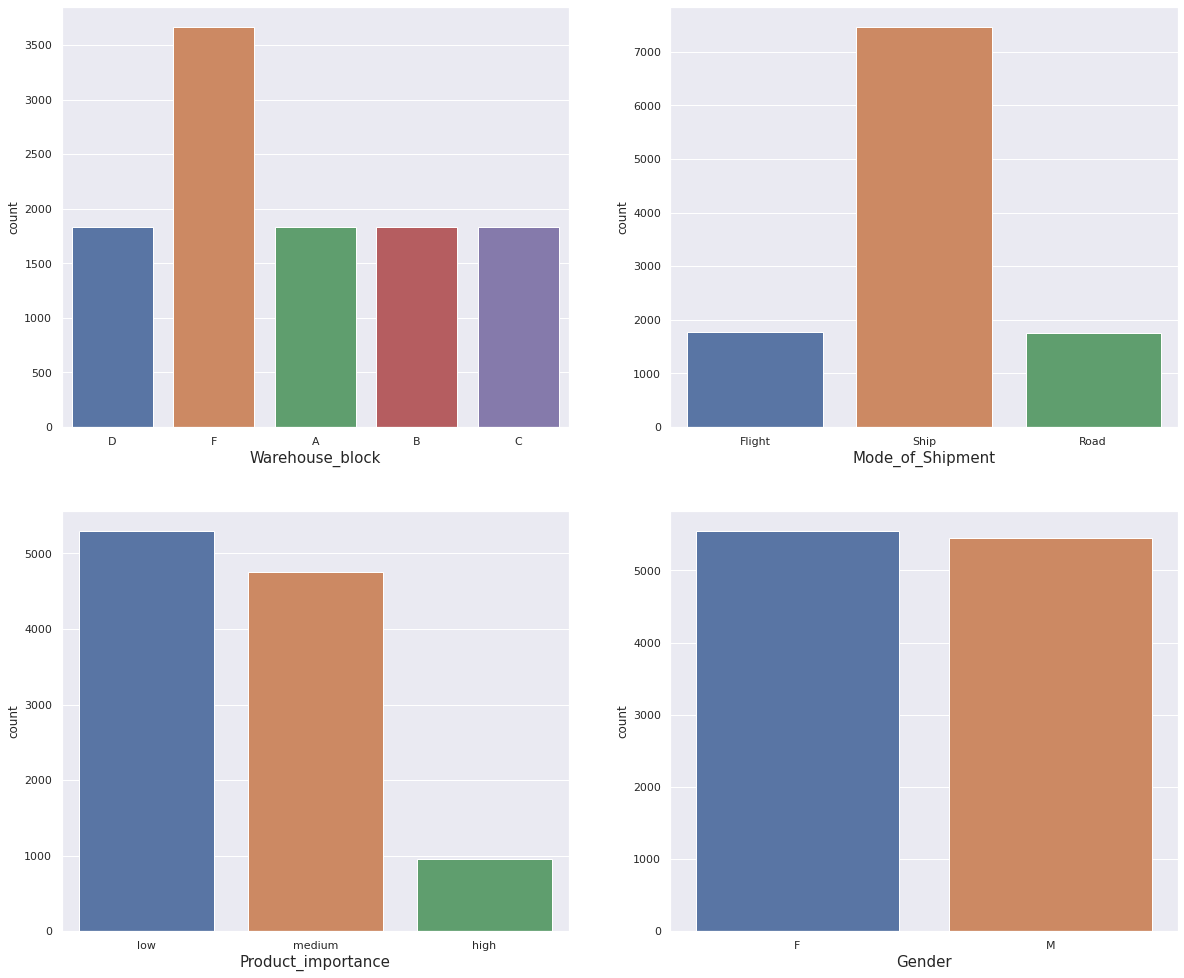

In [14]:
plt.figure(figsize=(20,17))
plotnumber = 1

for column in Categorical_col:
  if plotnumber <= 5:
    ax = plt.subplot(2,2,plotnumber)
    sns.countplot(Categorical_col[column])
    plt.xlabel(column,fontsize = 15)
  plotnumber+=1
plt.show()

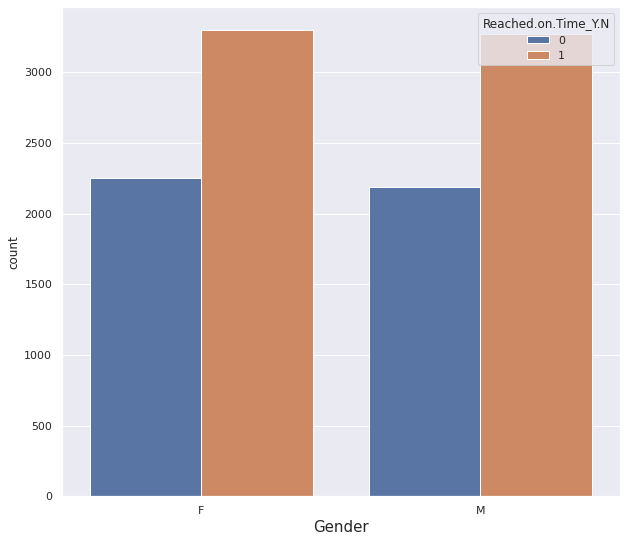

In [15]:
## Gender

plt.figure(figsize = (10,9))
sns.countplot(data=data,x='Gender',hue='Reached.on.Time_Y.N')
plt.xlabel("Gender",fontsize = 15)
plt.show()

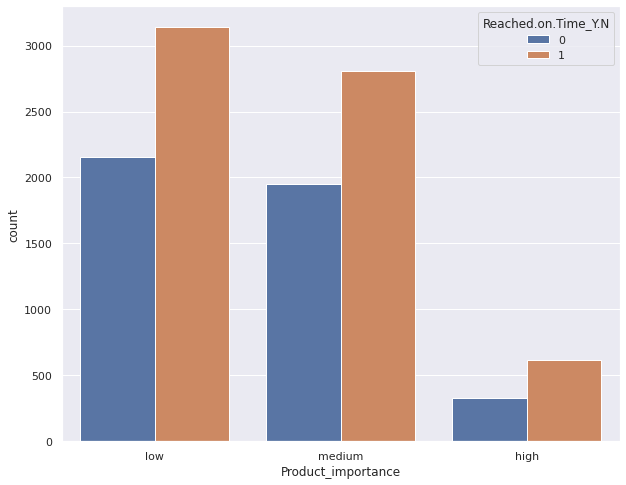

In [16]:
plt.figure(figsize=(10,8))
sns.countplot(data=data,x='Product_importance',hue='Reached.on.Time_Y.N')
plt.show()

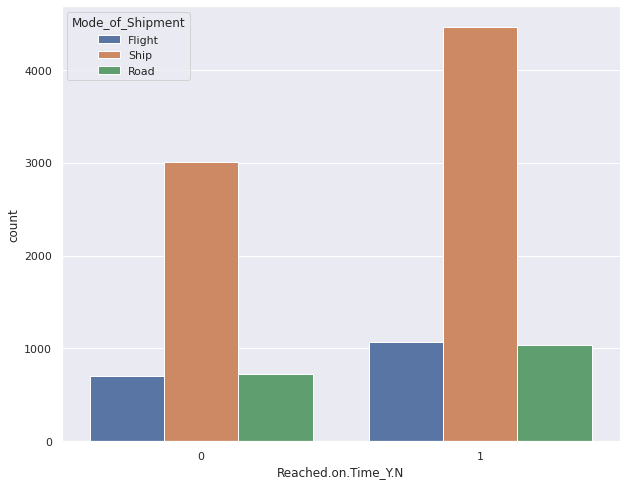

In [17]:
plt.figure(figsize=(10,8))
sns.countplot(data=data,x='Reached.on.Time_Y.N',hue = "Mode_of_Shipment")
plt.show()

**Encoding the categorical variables**

In [18]:
le = LabelEncoder()

In [19]:
def Label_Enc(col):
  Categorical_col[col] = le.fit_transform(Categorical_col[col])

In [20]:
for i in ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']:
  Label_Enc(i)

In [21]:
Categorical_col.head()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
0,3,0,1,0
1,4,0,1,1
2,0,0,1,1
3,1,0,2,1
4,2,0,2,0


**2. Numerical Columns**

In [22]:
num_col = [clm for clm in data.columns if data[clm].dtype != "O"]
num_col

['ID',
 'Customer_care_calls',
 'Customer_rating',
 'Cost_of_the_Product',
 'Prior_purchases',
 'Discount_offered',
 'Weight_in_gms',
 'Reached.on.Time_Y.N']

In [23]:
data[num_col].head()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,4,2,177,3,44,1233,1
1,2,4,5,216,2,59,3088,1
2,3,2,2,183,4,48,3374,1
3,4,3,3,176,4,10,1177,1
4,5,2,2,184,3,46,2484,1


In [24]:
Numerical_col = data[num_col]
Numerical_col.head()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,4,2,177,3,44,1233,1
1,2,4,5,216,2,59,3088,1
2,3,2,2,183,4,48,3374,1
3,4,3,3,176,4,10,1177,1
4,5,2,2,184,3,46,2484,1


In [25]:
Numerical_col.shape

(10999, 8)

In [26]:
Numerical_col.drop(columns = ["ID"],axis = 1,inplace = True)
Numerical_col.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,4,2,177,3,44,1233,1
1,4,5,216,2,59,3088,1
2,2,2,183,4,48,3374,1
3,3,3,176,4,10,1177,1
4,2,2,184,3,46,2484,1


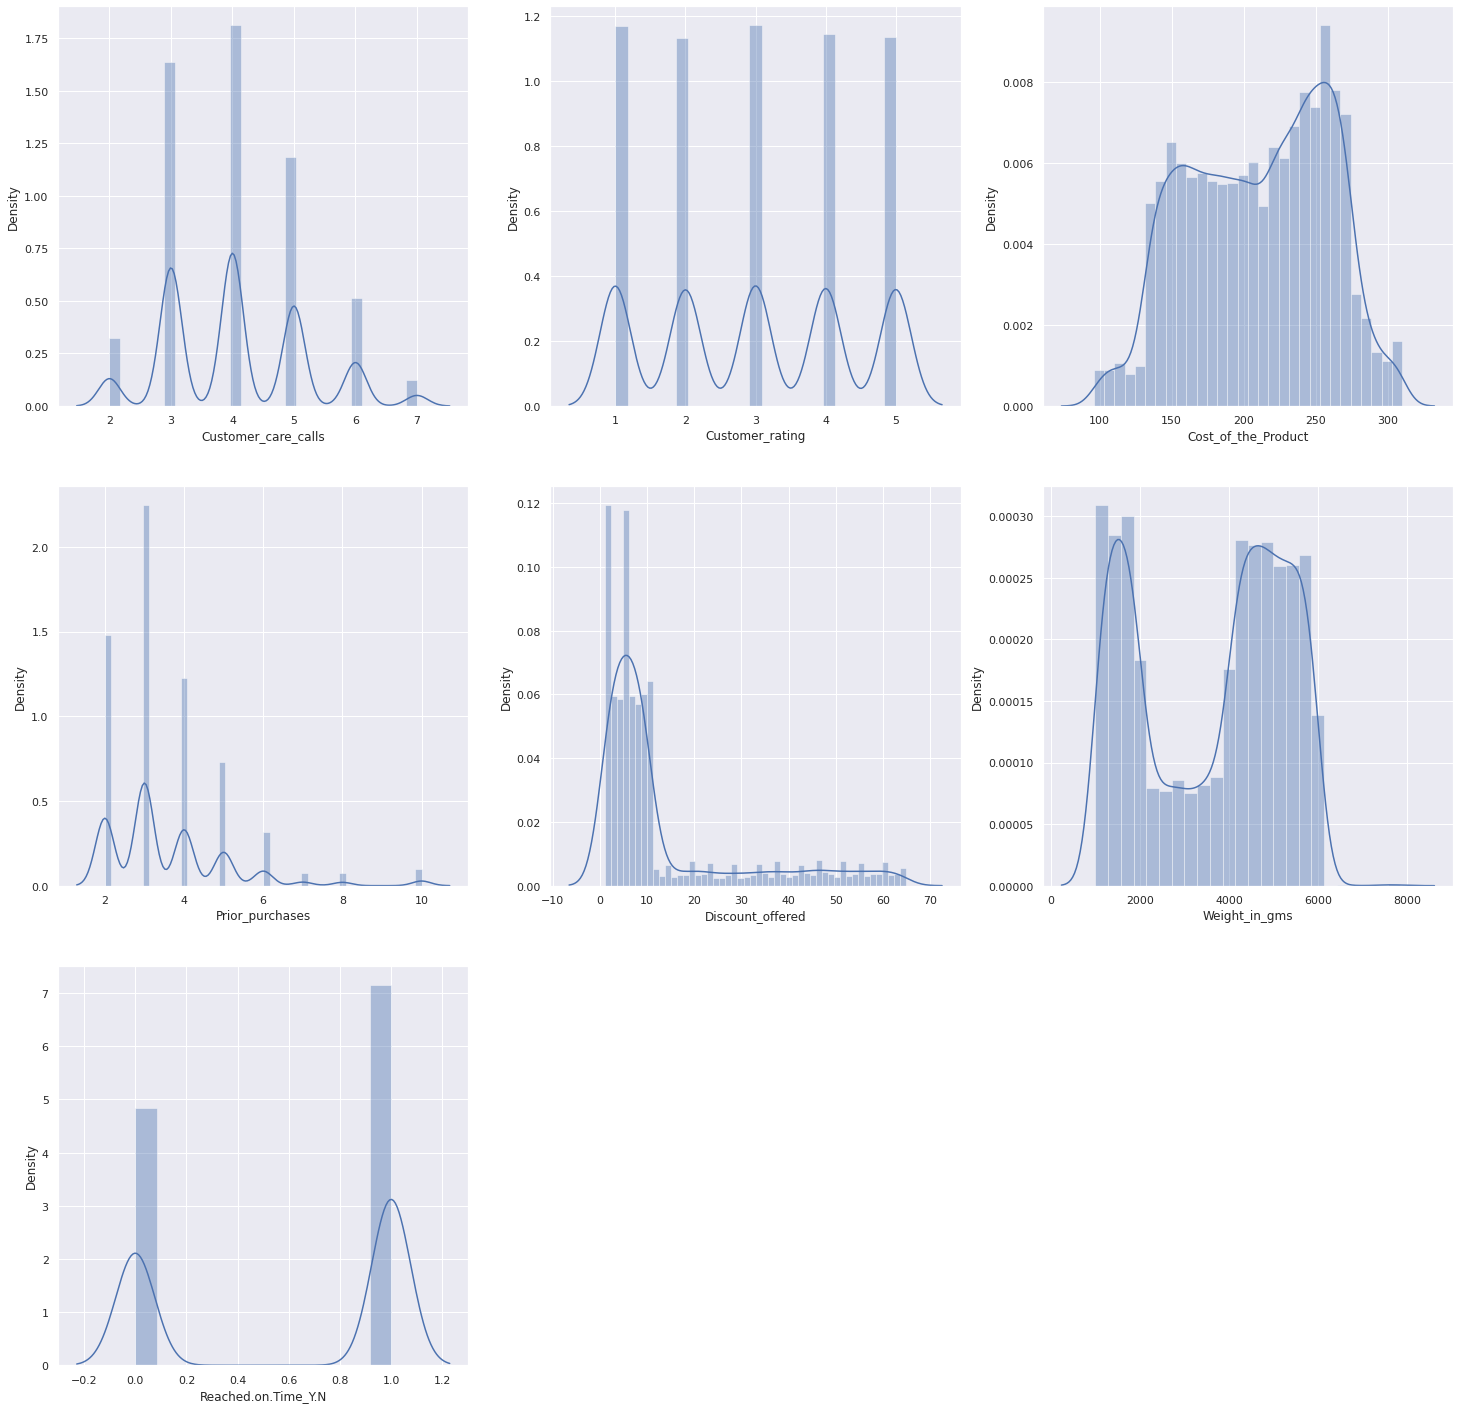

In [27]:
plt.figure(figsize=(25,25))
plotnumber = 1

for column in Numerical_col:
  if plotnumber <= 10:
    ax = plt.subplot(3,3,plotnumber)
    sns.distplot(Numerical_col[column])
    plt.xlabel(column)
  plotnumber+=1
plt.show()

[]

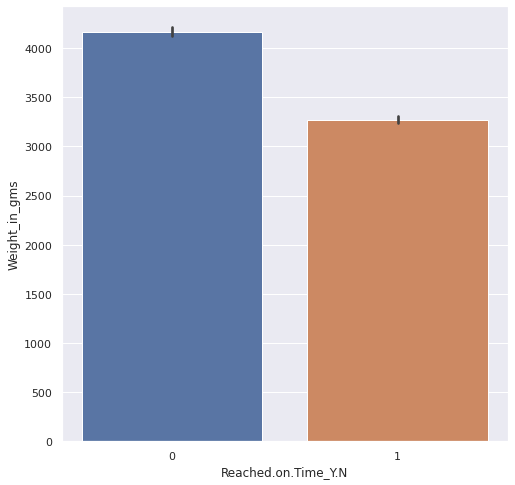

In [28]:
# Heavy weight items are most likely to be late than light weight

plt.figure(figsize=(8,8))
sns.barplot(data = data, x = "Reached.on.Time_Y.N",y = "Weight_in_gms")
plt.plot()

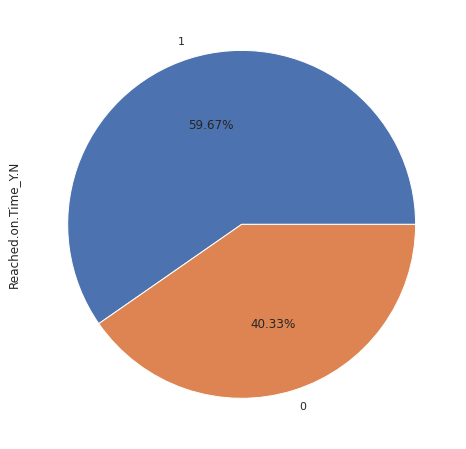

In [29]:
plt.figure(figsize=(8,8))
data['Reached.on.Time_Y.N'].value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.show()     

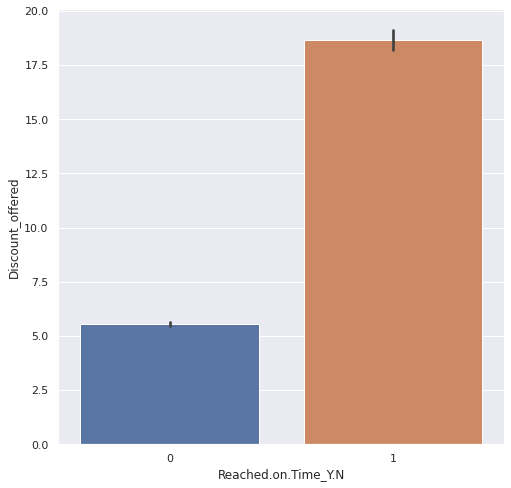

In [30]:
plt.figure(figsize=(8,8))
sns.barplot(data=data, x = "Reached.on.Time_Y.N", y = "Discount_offered")
plt.show()

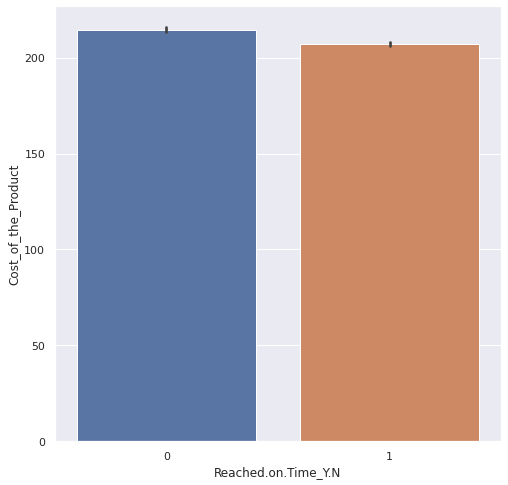

In [31]:
plt.figure(figsize=(8,8))
sns.barplot(data=data, x = "Reached.on.Time_Y.N", y = "Cost_of_the_Product")
plt.show()

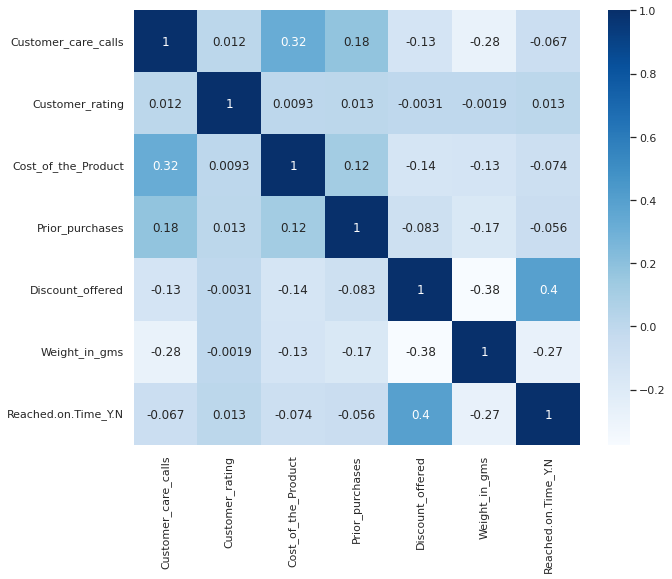

In [32]:
# constructing a heatmap to understand the correlation

plt.figure(figsize=(10,8))
sns.heatmap(Numerical_col.corr(), cmap='Blues',annot = True)
plt.show()

### **Concatenate Categorical and Numerical**

In [33]:
df = pd.concat([Categorical_col,Numerical_col],axis=1)
df.head()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,3,0,1,0,4,2,177,3,44,1233,1
1,4,0,1,1,4,5,216,2,59,3088,1
2,0,0,1,1,2,2,183,4,48,3374,1
3,1,0,2,1,3,3,176,4,10,1177,1
4,2,0,2,0,2,2,184,3,46,2484,1


In [34]:
df.shape

(10999, 11)

In [35]:
df.describe()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,2.333394,1.516865,1.346031,0.495863,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.490726,0.756894,0.631434,0.500006,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,3.000000,2.000000,1.000000,0.000000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,4.000000,2.000000,2.000000,1.000000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,4.000000,2.000000,2.000000,1.000000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Warehouse_block      10999 non-null  int64
 1   Mode_of_Shipment     10999 non-null  int64
 2   Product_importance   10999 non-null  int64
 3   Gender               10999 non-null  int64
 4   Customer_care_calls  10999 non-null  int64
 5   Customer_rating      10999 non-null  int64
 6   Cost_of_the_Product  10999 non-null  int64
 7   Prior_purchases      10999 non-null  int64
 8   Discount_offered     10999 non-null  int64
 9   Weight_in_gms        10999 non-null  int64
 10  Reached.on.Time_Y.N  10999 non-null  int64
dtypes: int64(11)
memory usage: 945.4 KB


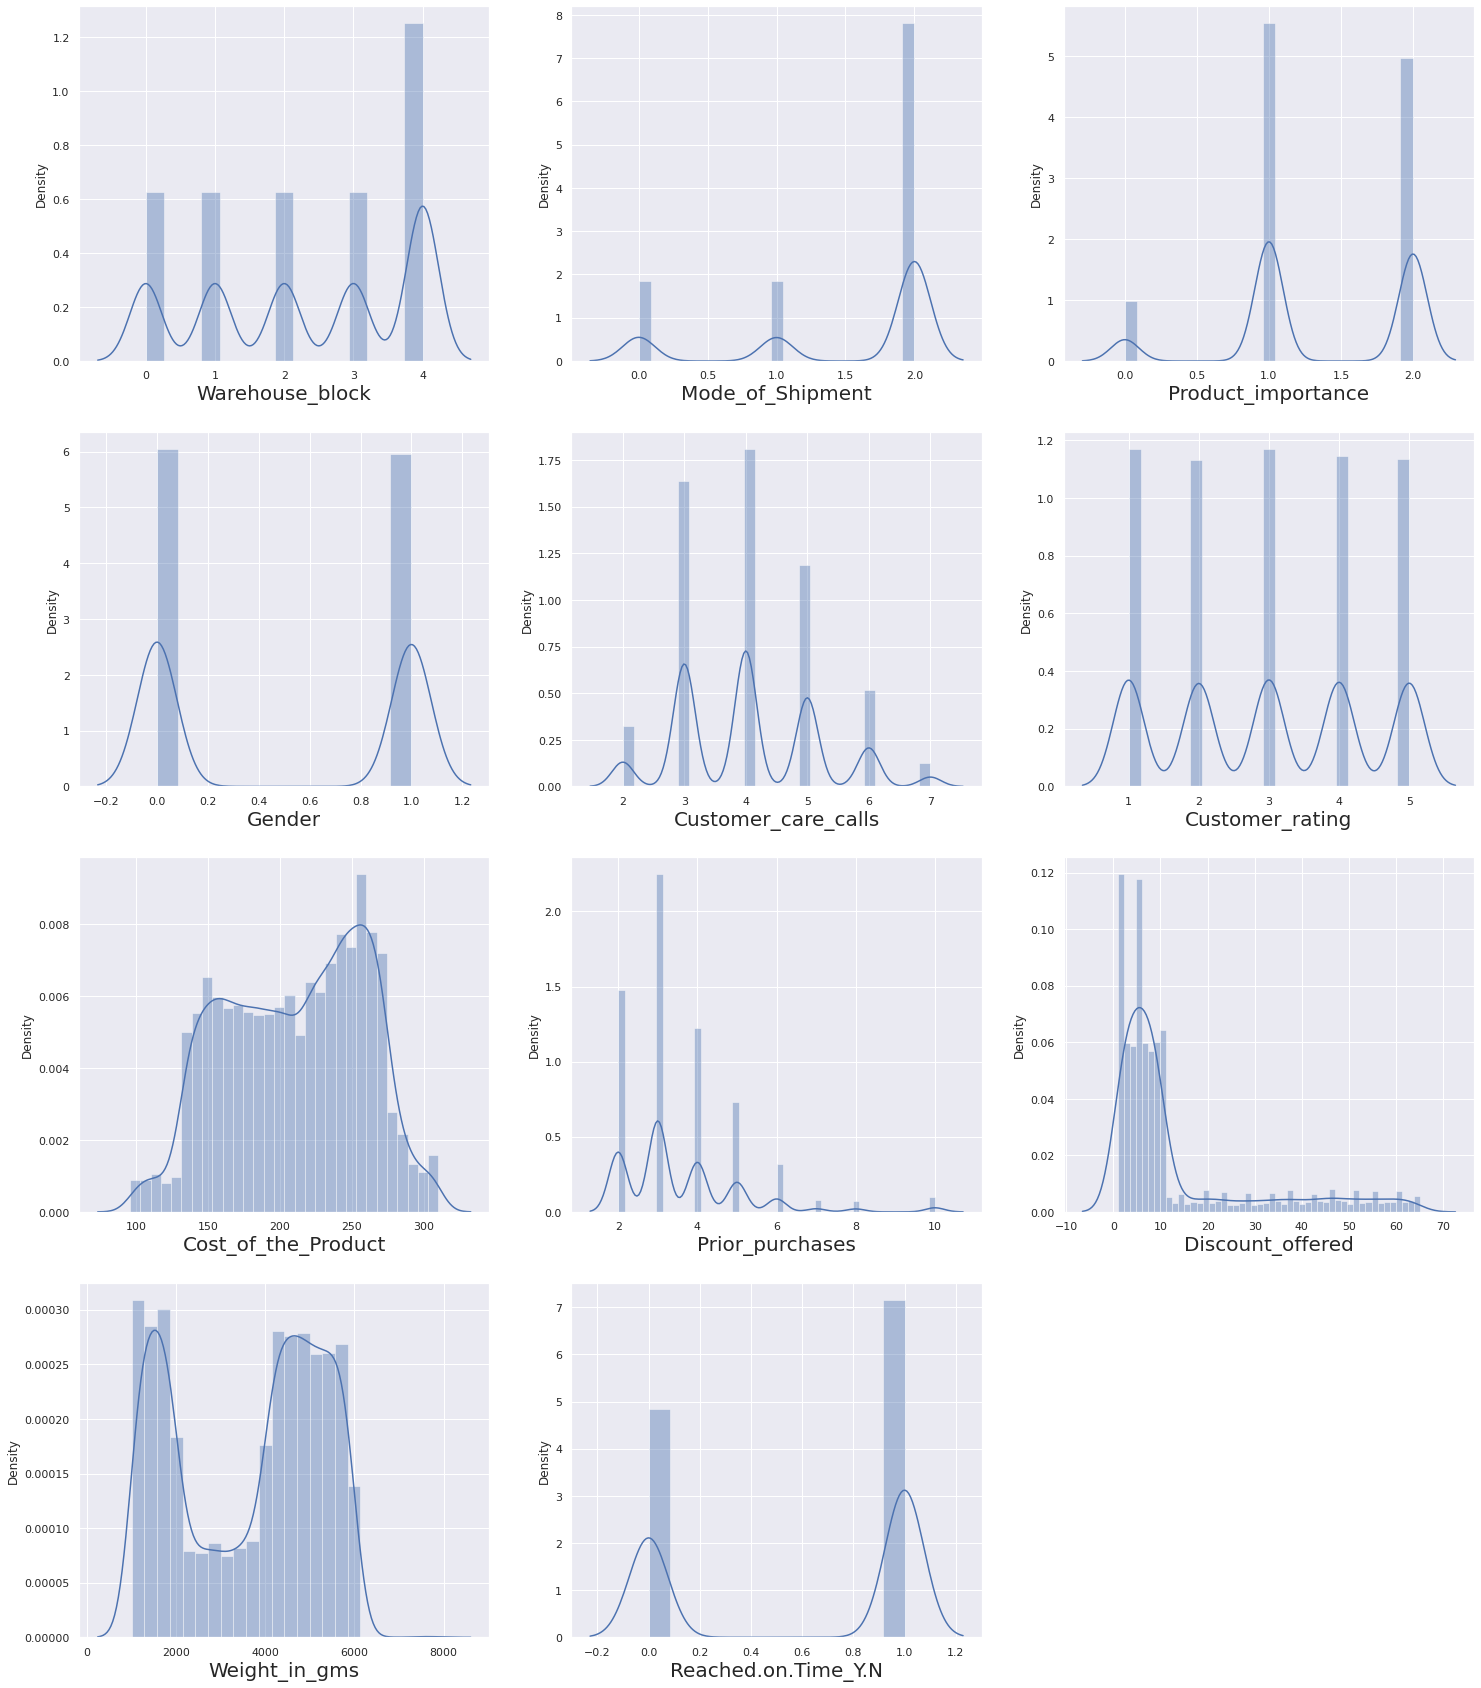

In [37]:
plt.figure(figsize=(25,30))
plotnumber = 1

for column in df:
  if plotnumber <= 15:
    ax = plt.subplot(4,3,plotnumber)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize = 20)
  plotnumber+=1
plt.show()

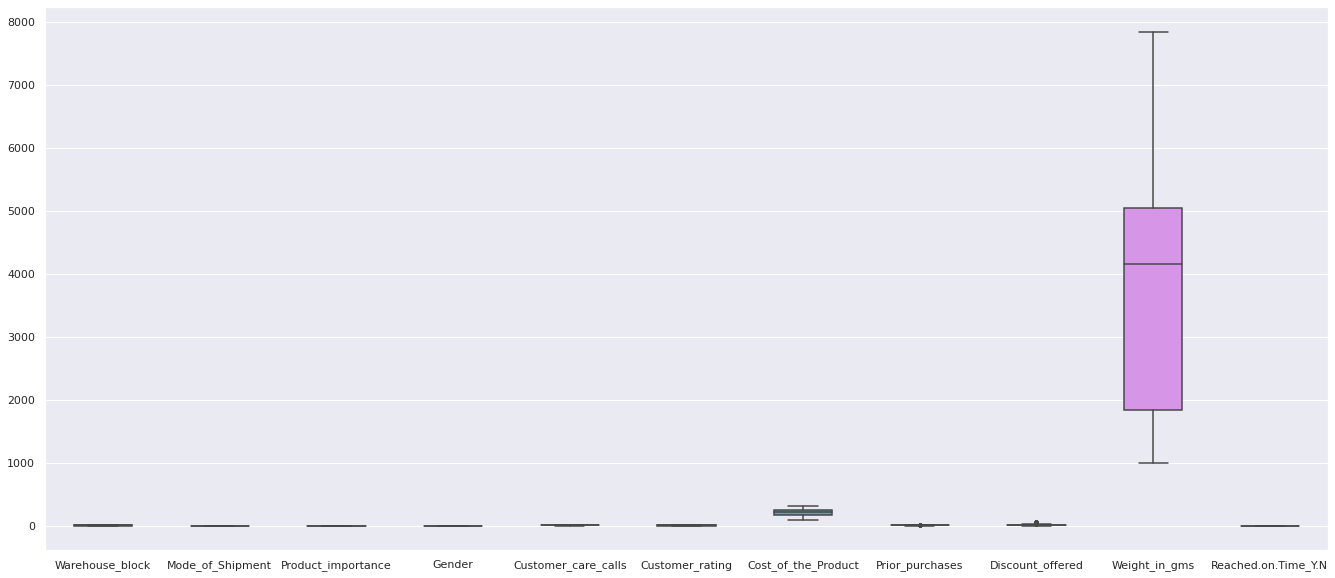

In [38]:
fig,ax = plt.subplots(figsize = (23,10))
sns.boxplot(data=df,width = 0.5,fliersize = 3,ax=ax)

<Figure size 1440x1440 with 0 Axes>

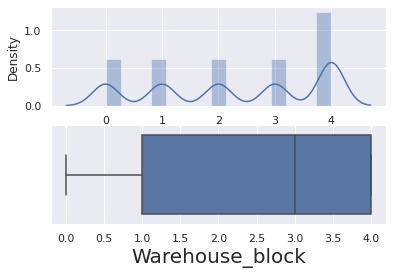

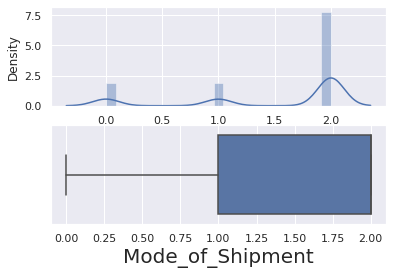

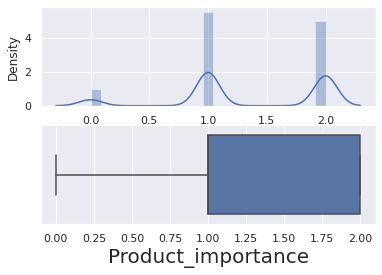

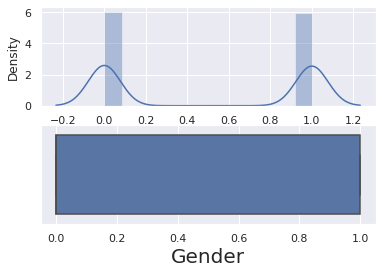

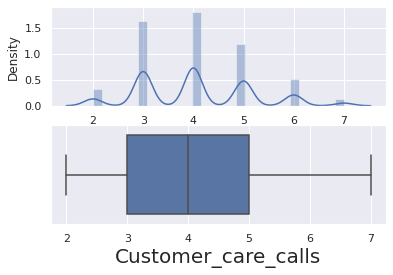

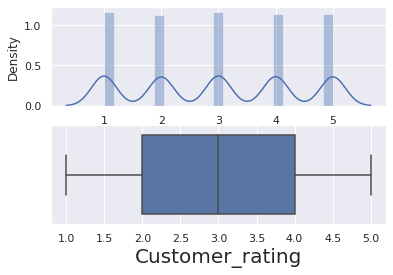

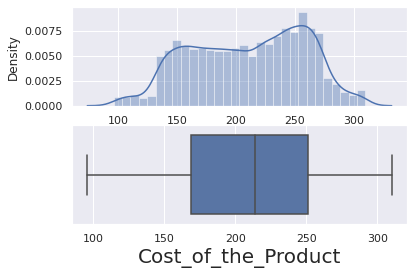

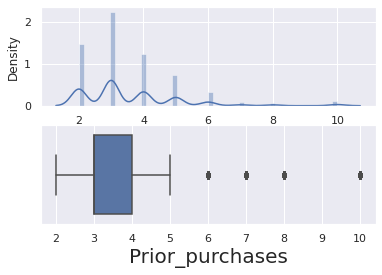

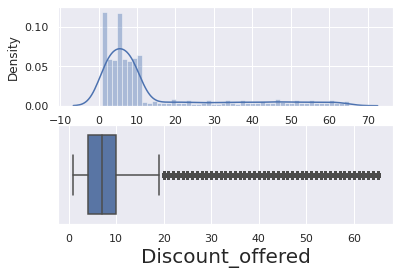

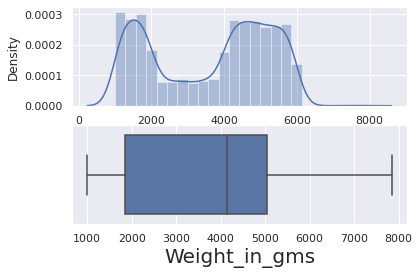

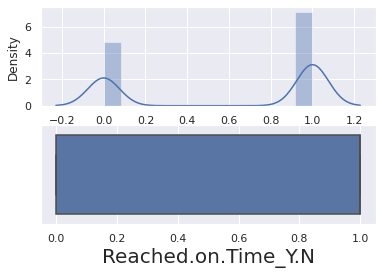

In [39]:
plt.figure(figsize=(20,20))
plotnumber = 1

for column in df:
  if plotnumber <= 15:
    fig,(ax1,ax2)=plt.subplots(2,1) #Subplot 
    sns.distplot(df[column],ax=ax1) #distplot
    sns.boxplot(df[column],ax=ax2) #boxplot
    plt.xlabel(column,fontsize = 20)
  plotnumber+=1
plt.show()
     

In [40]:
df.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender',
       'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

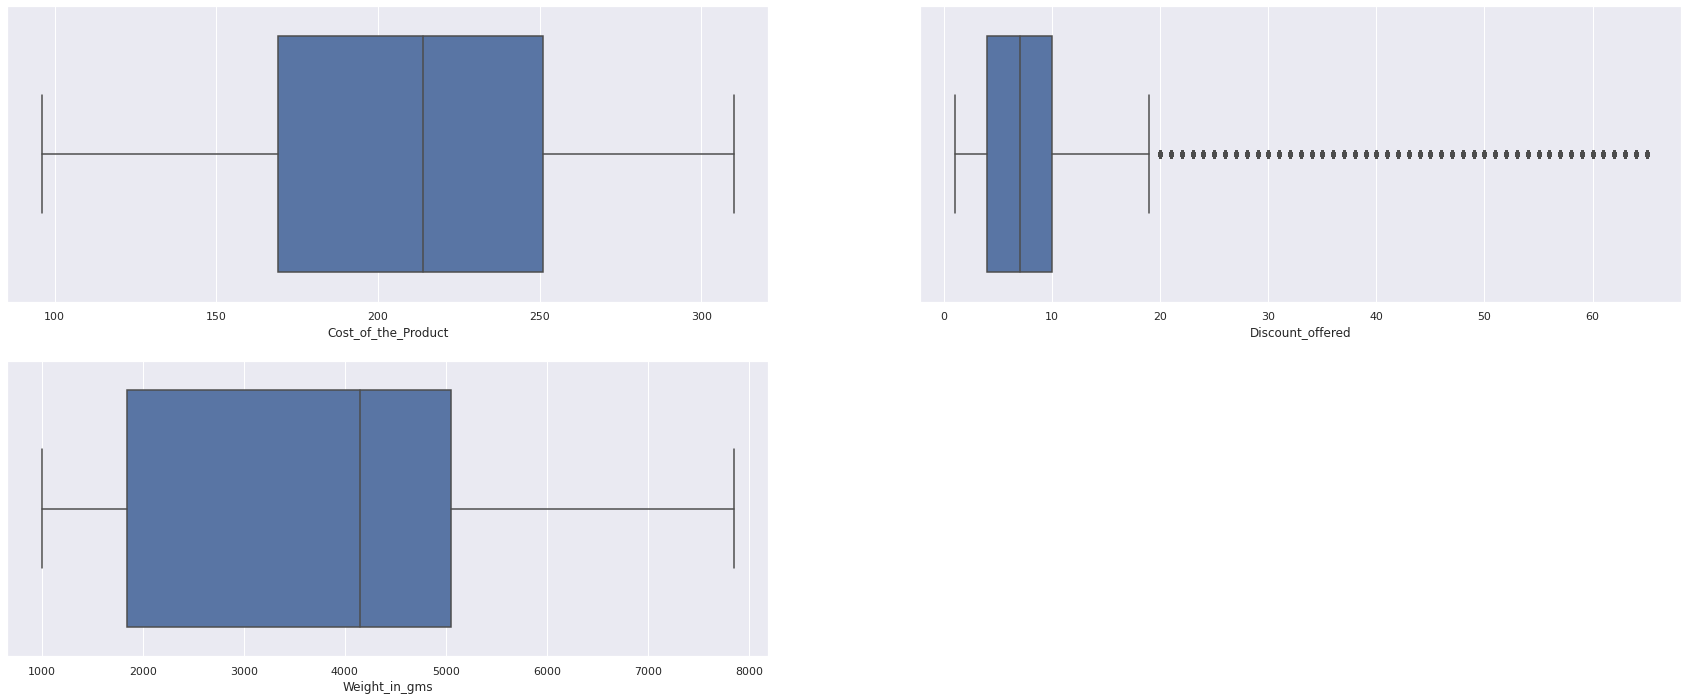

In [41]:
plt.figure(figsize=(30,25))
plt.subplot(4,2,1)
sns.boxplot(df["Cost_of_the_Product"])
plt.subplot(4,2,2)
sns.boxplot(df["Discount_offered"])
plt.subplot(4,2,3)
sns.boxplot(df["Weight_in_gms"])

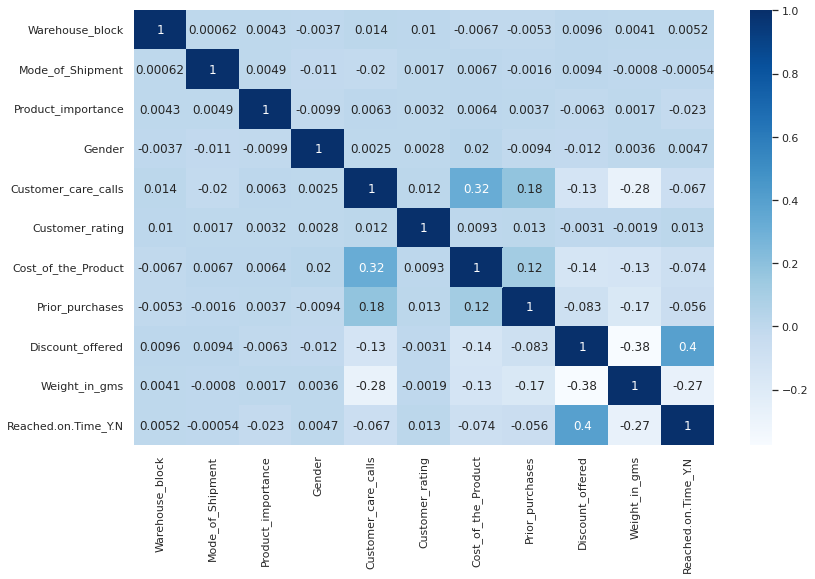

In [42]:
# constructing a heatmap to understand the correlation

plt.figure(figsize=(13,8))
sns.heatmap(df.corr(), cmap='Blues',annot = True)
plt.show()

**Split Independent and Dependent Features**

In [43]:
X = df.drop(columns = ["Reached.on.Time_Y.N"],axis = 1)
y = df["Reached.on.Time_Y.N"] 

In [44]:
X.head()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
0,3,0,1,0,4,2,177,3,44,1233
1,4,0,1,1,4,5,216,2,59,3088
2,0,0,1,1,2,2,183,4,48,3374
3,1,0,2,1,3,3,176,4,10,1177
4,2,0,2,0,2,2,184,3,46,2484


In [45]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Reached.on.Time_Y.N, dtype: int64

**Feature Scaling**

In [46]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X)
X_train

array([[ 0.4471892 , -2.00415767, -0.54803358, ..., -0.37273475,
         1.88998336, -1.46823975],
       [ 1.11803399, -2.00415767, -0.54803358, ..., -1.02942377,
         2.81563557, -0.33389333],
       [-1.56534517, -2.00415767, -0.54803358, ...,  0.28395426,
         2.13682395, -0.15900218],
       ...,
       [-0.22365559,  0.63834175, -0.54803358, ...,  0.94064328,
        -0.57842252, -1.51593733],
       [ 1.11803399,  0.63834175,  1.03573451, ...,  1.5973323 ,
        -0.70184282, -1.48230442],
       [ 0.4471892 ,  0.63834175, -0.54803358, ...,  0.94064328,
        -0.45500223, -1.2199677 ]])

**VIF**

In [47]:
variables = X_train

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

In [48]:
vif

,VIF,Features
0,1.000807,Warehouse_block
1,1.000837,Mode_of_Shipment
2,1.000245,Product_importance
3,1.000892,Gender
4,1.260361,Customer_care_calls
5,1.000431,Customer_rating
6,1.143873,Cost_of_the_Product
7,1.070575,Prior_purchases
8,1.294880,Discount_offered
9,1.383285,Weight_in_gms


**Splitting the data for training and Testing**

In [49]:
#split the data into training and testing

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 10)

In [50]:
print("Shape of X Train: ",X_train.shape)
print("Shape of X Test: ",X_test.shape)
print("Shape of y Train: ",y_train.shape)
print("Shape of y Test: ",y_test.shape)

Shape of X Train:  (8799, 10)
Shape of X Test:  (2200, 10)
Shape of y Train:  (8799,)
Shape of y Test:  (2200,)


**Model Building**

In [51]:
def ML_model(model):
  #model = LogisticRegression()
  model.fit(X_train,y_train)

  y_pred = model.predict(X_test)
# print(y_pred)

#Evaluation for Logistic Regression
# Accuracy,F1_Score, Precision_Score,Recall_Score
  print("Confusion Matrix :\n ",(confusion_matrix(y_test,y_pred)))
  print()
  print("Accuracy_Score: ", round(accuracy_score(y_test,y_pred)*100,3),"%")
  print()
  print("F1 Score: ", round(f1_score(y_test,y_pred)*100,3))
  print("Precision Score: ", round(precision_score(y_test,y_pred)*100,3))
  print("Recall Score :", round(recall_score(y_test,y_pred)*100,3))
  print("AUC Score :", round(roc_auc_score(y_test,y_pred)*100,3))
  print("\n")
#Entire Report of the Model
  print("Entire Report of the Model: \n", (classification_report(y_test,y_pred)))
  plt.show()

In [52]:
ML_model(LogisticRegression())

Confusion Matrix :
  [[532 363]
 [408 897]]

Accuracy_Score:  64.955 %

F1 Score:  69.942
Precision Score:  71.19
Recall Score : 68.736
AUC Score : 64.088


Entire Report of the Model: 
               precision    recall  f1-score   support

           0       0.57      0.59      0.58       895
           1       0.71      0.69      0.70      1305

    accuracy                           0.65      2200
   macro avg       0.64      0.64      0.64      2200
weighted avg       0.65      0.65      0.65      2200



In [53]:
ML_model(DecisionTreeClassifier())

Confusion Matrix :
  [[487 408]
 [357 948]]

Accuracy_Score:  65.227 %

F1 Score:  71.251
Precision Score:  69.912
Recall Score : 72.644
AUC Score : 63.529


Entire Report of the Model: 
               precision    recall  f1-score   support

           0       0.58      0.54      0.56       895
           1       0.70      0.73      0.71      1305

    accuracy                           0.65      2200
   macro avg       0.64      0.64      0.64      2200
weighted avg       0.65      0.65      0.65      2200



In [54]:
ML_model(RandomForestClassifier())

Confusion Matrix :
  [[607 288]
 [465 840]]

Accuracy_Score:  65.773 %

F1 Score:  69.051
Precision Score:  74.468
Recall Score : 64.368
AUC Score : 66.095


Entire Report of the Model: 
               precision    recall  f1-score   support

           0       0.57      0.68      0.62       895
           1       0.74      0.64      0.69      1305

    accuracy                           0.66      2200
   macro avg       0.66      0.66      0.65      2200
weighted avg       0.67      0.66      0.66      2200

